In [1]:
# -*- coding:utf-8 -*-
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as mfm
import matplotlib.gridspec as gridspec
import matplotlib.ticker as plticker

### 目标图表形式

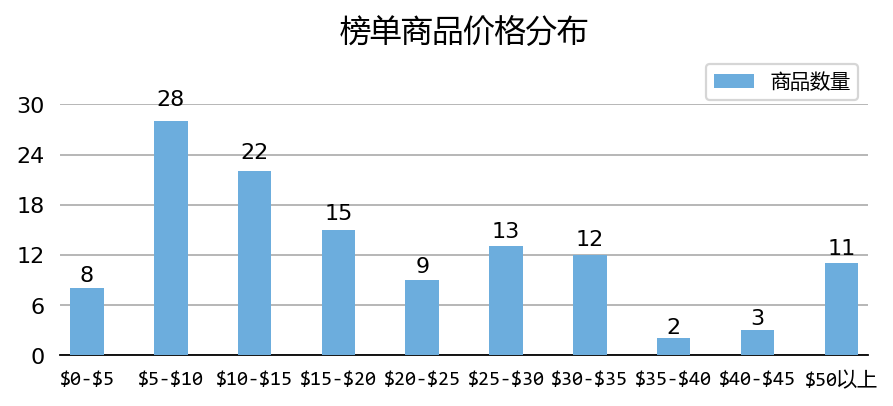

In [2]:
Image('./source/plot_bar.png')

In [3]:
data = np.array([['$0-$5', 8],
       ['$5-$10', 28],
       ['$10-$15', 22],
       ['$15-$20', 15],
       ['$20-$25', 9],
       ['$25-$30', 13],
       ['$30-$35', 12],
       ['$35-$40', 2],
       ['$40-$45', 3],
       ['$50以上', 11]], dtype=object)

In [4]:
data[:,1]

array([8, 28, 22, 15, 9, 13, 12, 2, 3, 11], dtype=object)

### 前期准备

#### 准备需要的字体handle
要想在图表中显示中文，需要使用中文字体，而matplotlib中提供了直接使用自定义字体的handle，我们只需要预设好想要使用的字体。

In [5]:
# 把字体文件放入font文件夹中，也可以在此设置字体文件的路径
font_path = {'hei':'./font/MSYHMONO.ttf',
    'english' : './font/Calibri.ttf'}
# 实例化可以直接使用的字体handle
prop = {font_name : mfm.FontProperties(fname=font_path[font_name]) 
        for font_name in list(font_path)}

In [6]:
# 设置可选配色
default_colors = {}
default_colors['blue'] = '#6CADDD'
default_colors['yellow'] = '#F3903F'
default_colors['red'] = '#CB615A'
default_colors['orange'] = '#F3903F'
default_colors['gray'] = '#B4B4B4'
default_colors['lightyellow'] = '#FCC900'
default_colors['royalblue'] = '#5488CF'

### 做出初始的图布

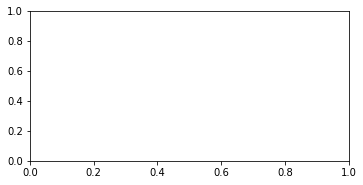

In [7]:
length = len(data)
x = np.arange(length)
y = data[:,1]
# 首先设置作图的大小
IMAGE_WIDTH = 5.708
IMAGE_HIGH = 2.756
# 实例化Figure
fig = plt.figure(figsize=(IMAGE_WIDTH, IMAGE_HIGH))
# 添加gs，方便后续的设置
gs = gridspec.GridSpec(1, 1)
# 在gs上添加作图用的Axes
ax = fig.add_subplot(gs[0])
fig

### 设置横坐标标签

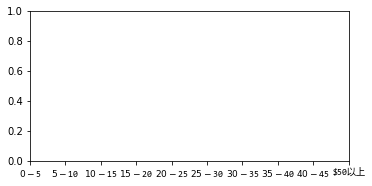

In [8]:
# 字体为黑体9号
xticks_font = prop['hei'].copy()
xticks_font.set_size(9)
# 文字的倾斜角度为水平
xticks_rotation = 'horizontal'
labels = data[:,0]
plt.xticks(x, labels, fontproperties=xticks_font, rotation=xticks_rotation) 
fig

In [9]:
labels

array(['$0-$5', '$5-$10', '$10-$15', '$15-$20', '$20-$25', '$25-$30',
       '$30-$35', '$35-$40', '$40-$45', '$50以上'], dtype=object)

**注意**

labels中的结果使用`'$0-$5'`的形式无法正常显示`$`，需要在`$`前加入`\`

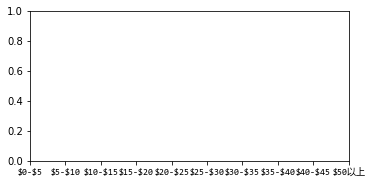

In [10]:
labels = list(map(lambda x:x.replace('$', '\$'), data[:,0]))
plt.xticks(x, labels, fontproperties=xticks_font, rotation=xticks_rotation) 
fig

### 画出基本图形

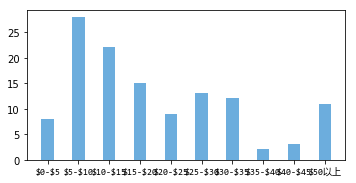

In [11]:
rects = plt.bar(x, y, 0.4, zorder=3, color=default_colors['blue'])
fig

### 添加标注

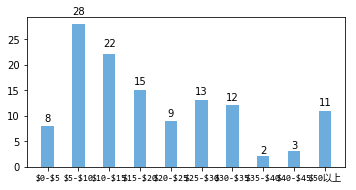

In [12]:
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.05*height, 
                '%d' % int(height), 
                ha='center', va='bottom')
fig

### 调整边框Spines

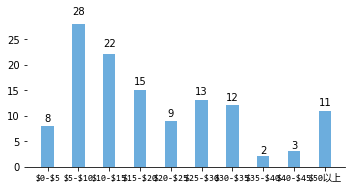

In [13]:
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
fig

### 去除多余的Tick

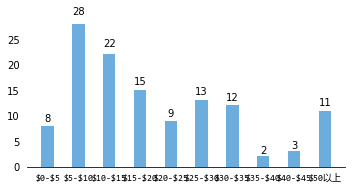

In [15]:
ax.tick_params(axis='both', which='both', bottom=False, top=False, 
        labelbottom=True, left=False, right=False, labelleft=True)
fig

### 添加标题

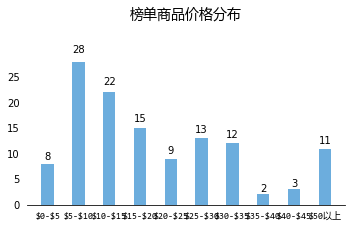

In [34]:
# 设置标题为黑体，14号
title_font = prop['hei'].copy()
title_font.set_size(14)
# 设置标题内容
title = "榜单商品价格分布"
# 设置标题相对图片的位置
title_y = 1.2
ax.set_title(title, fontproperties=title_font, y=title_y)
fig

### 添加图例

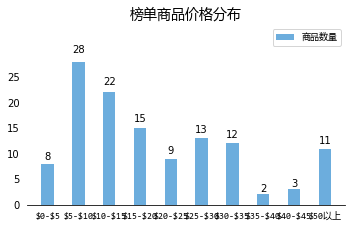

In [35]:
# 设置图例格式
legend_font = prop['hei'].copy()
legend_font.set_size(9)
# 图例内容
legend_name=['商品数量']
ax.legend(legend_name, loc='upper right', bbox_to_anchor=(1, 1.2), prop=legend_font, frameon=True)
fig

### 紧凑排布
现在虽然内容已经添加设置完毕，但是排布太过稀松，需要使用较为紧密的排布

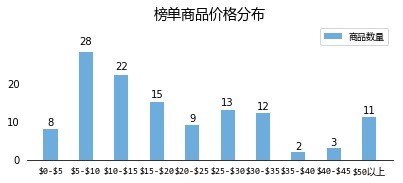

In [36]:
gs.tight_layout(fig)
fig

### 添加Grid

使用快速grid可以添加方格状的grid，但是我们需要的是对y轴进行5-6次分割的grid，所以我们可以手动设置分割间隔。

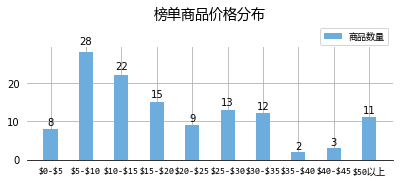

In [19]:
ax.grid()
fig

使用快速grid可以添加方格状的grid，但是我们需要的是对y轴进行5-6次分割的grid，所以我们可以手动设置分割间隔。

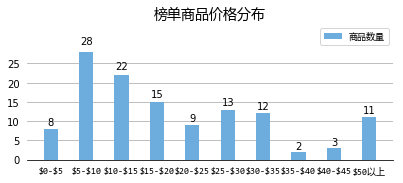

In [39]:
intervals = 5
loc = plticker.MultipleLocator(base=intervals)
ax.yaxis.set_major_locator(loc)
ax.grid(axis='y', zorder=0)
fig

不过每一次都手动设定y轴间隔太过麻烦了，所以我们可以手动写个自动划分的函数，确定间隔

y轴取值范围 : 29.4
y轴grid间隔为 ：6.0


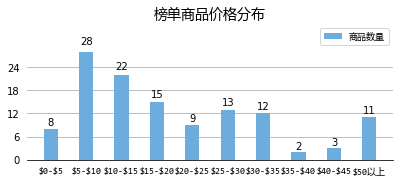

In [41]:
# 获取y轴取值范围
get_ax_space = lambda x: x.get_ylim()[1] - x.get_ylim()[0]
ax_space = get_ax_space(ax)
print("y轴取值范围 : {}".format(ax_space))
def get_interval(ax_space, space_number=5):
    digit_number = len(str((ax_space)))
    intervals = int((ax_space)/(space_number*(10**digit_number)))
    while intervals == 0:
        digit_number -= 1
        intervals = int((ax_space)/(space_number*(10**digit_number)))
    linshi = round((ax_space)/(space_number*(10**digit_number)))
    intervals = linshi*(10**digit_number)
    return intervals

intervals = get_interval(ax_space)
print("y轴grid间隔为 ：{}".format(intervals))

loc = plticker.MultipleLocator(base=intervals)
ax.yaxis.set_major_locator(loc)
ax.grid(axis='y', zorder=0)
fig

### 模块化： 整理为可复用的模板（作业）

### 模块化结果

In [58]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as mfm
import matplotlib.gridspec as gridspec
import matplotlib.ticker as plticker

class Image(object):
    font_path = {}
    prop = {}
    font_path['hei'] = './font/MSYHMONO.ttf'
    font_path['english'] = './font/Calibri.ttf'
    for font_name in list(font_path):
        prop[font_name] = mfm.FontProperties(fname=font_path[font_name])

    title_font = prop['hei'].copy()
    title_font.set_size(14)
    xticks_font = prop['hei'].copy()
    xticks_font.set_size(9)
    ylable_font = prop['hei'].copy()
    ylable_font.set_size(10)
    legend_font = prop['hei'].copy()
    legend_font.set_size(9)
    default_colors = {}
    default_colors['blue'] = '#6CADDD'
    default_colors['yellow'] = '#F3903F'
    default_colors['red'] = '#CB615A'
    default_colors['orange'] = '#F3903F'
    default_colors['gray'] = '#B4B4B4'
    default_colors['lightyellow'] = '#FCC900'
    default_colors['royalblue'] = '#5488CF'

    IMAGE_WIDTH = 5.708
    IMAGE_HIGH = 2.756

    def __init__(self, title=None, labels=None, data=None, 
        image_path=None, title_y=1.1, xticks_rotation='vertical', legend_name=[]):
        self.length = len(data)
        self.x = np.arange(self.length)
        self.y = data
        self.data = data
        self.title_y = title_y
        self.title = title
        self.labels = labels
        self.legend_name = legend_name
        self.xticks_rotation = xticks_rotation

    def init(self):
        self.fig = plt.figure(figsize=(self.IMAGE_WIDTH, self.IMAGE_HIGH))
        self.gs = gridspec.GridSpec(1, 1)
        self.ax = self.fig.add_subplot(self.gs[0])
        self.set_xticks()
        self.add_title()
        self.plot()
        self.set_spines()
        self.set_tick_marks()
        self.add_legend()
        # 补充设定
        self.config_add()
        self.tight_layout()
        self.set_grid()
        plt.close()

    def add_legend(self):
        if not (self.legend_name is None):
            self.ax.legend(self.legend_name, loc='upper right', bbox_to_anchor=(1, 1.2), prop=self.legend_font, frameon=True)

    def tight_layout(self, **karg):
        self.gs.tight_layout(self.fig, **karg)

    def plot(self):
        rects = plt.bar(self.x, self.y, 0.4, zorder=3, color=self.default_colors['blue'])
        for rect in rects:
            height = rect.get_height()
            self.ax.text(rect.get_x() + rect.get_width()/2., 1.05*height, 
                        '%d' % int(height), 
                        ha='center', va='bottom')
    def add_title(self):
        if self.title:
            self.ax.set_title(self.title, fontproperties=self.title_font, y=self.title_y)

    def set_grid(self):
        get_ax_space = lambda x: x.get_ylim()[1] - x.get_ylim()[0]
        self.ax_space = get_ax_space(self.ax)
        def get_interval(ax_space, space_number=5):
            digit_number = len(str((ax_space)))
            intervals = int((ax_space)/(space_number*(10**digit_number)))
            while intervals == 0:
                digit_number -= 1
                intervals = int((ax_space)/(space_number*(10**digit_number)))
            linshi = round((ax_space)/(space_number*(10**digit_number)))
            intervals = linshi*(10**digit_number)
            return intervals

        if not 'intervals' in self.__dict__.keys():
            self.intervals = get_interval(self.ax_space)
        loc = plticker.MultipleLocator(base=self.intervals)
        self.ax.yaxis.set_major_locator(loc)
        self.ax.grid(axis='y', zorder=0)
        if 'ax2' in self.__dict__.keys():
            print("有双轴需要设置副轴grid")
            self.ax_space2 = get_ax_space(self.ax2)
            self.intervals2 = get_interval(self.ax_space2, space_number=5)
            loc2 = plticker.MultipleLocator(base=self.intervals2)
            self.ax2.yaxis.set_major_locator(loc2)

    def set_spines(self):
        self.ax.spines['right'].set_visible(False)
        self.ax.spines['top'].set_visible(False)
        self.ax.spines['left'].set_visible(False)

    def set_tick_marks(self):
        self.ax.tick_params(axis='both', which='both', bottom=False, top=False, 
                labelbottom=True, left=False, right=False, labelleft=True)
        
    def set_xticks(self):
        plt.xticks(self.x, self.labels, fontproperties=self.xticks_font, rotation=self.xticks_rotation) # 设置横坐标标签

    def show(self):
        plt.show()

    def save(self):
        if image_path:
            self.fig.savefig(image_path)
        else:
            logging.warning("Please sure image path firse")
            
    def config_add(self):
        """
        保留用于扩展功能或者设定
        """
        pass

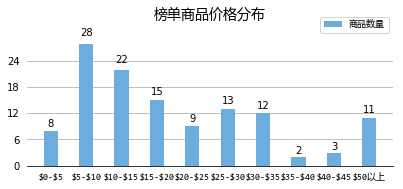

In [59]:
image = Image(data=data[:,1],
             labels=list(map(lambda x:x.replace('$', '\$'), data[:,0])),
             title='榜单商品价格分布',
             xticks_rotation=0,
             legend_name=['商品数量']
             )
image.init()
image.fig